# Post processing neutral ABL

In [1]:
%%capture 

# Important header information
amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend'         # official version
#amrwindfedir = '/ascldap/users/lcheung/local/Git/amrwind-frontend'  # My copy
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm
import re

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
saveplots = False
savedir   = '../abstract/images'

## Plot the wind direction change

In [3]:
wdirtable = np.loadtxt('time_table.txt')

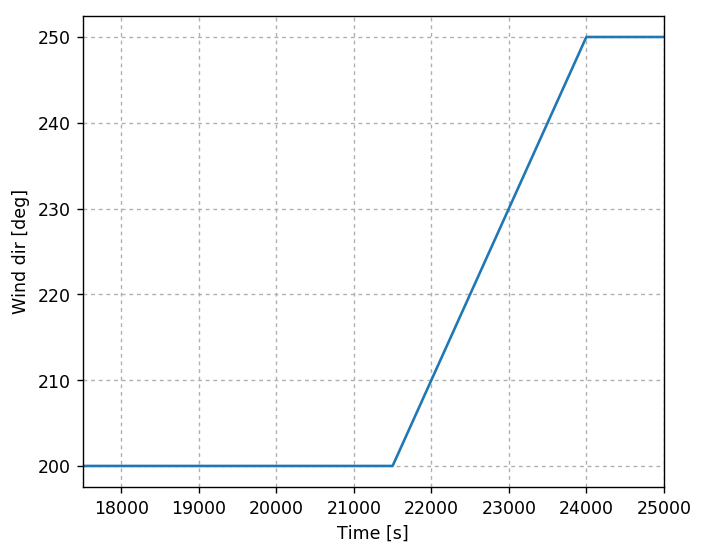

In [4]:
plt.figure(figsize=(6,5), dpi=125)
plt.plot(wdirtable[:,0], 270-wdirtable[:,2])
plt.xlabel('Time [s]')
plt.ylabel('Wind dir [deg]')
plt.xlim([17500, 25000])
plt.grid(ls=':')

## Load velocity profiles

In [5]:
# Set your run directory here
casedir = '/ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor2_5x5_uniform/'
wdirdir = '/ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor3_6x6_small_dirchange'

# Average between 15,000 sec to 20,000 sec
avgtimes = [15000, 20000]

# Hub-height locations
plotheights=[150]

### Load the uniform case

In [6]:
# Start the amrwind_frontend app 
case = amrwind.MyApp.init_nogui()
case.ABLpostpro_loadnetcdffile(casedir+'/post_processing/abl_statistics00000.nc')

Loading /ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor2_5x5_uniform//post_processing/abl_statistics00000.nc
Time range: 0.250000 to 20000.000000
Done.


In [7]:
# First, let's look at the hub-height averaged statistics
case.ABLpostpro_printreport(avgt=avgtimes, avgz=plotheights)

Loading w'theta'_r
Loading theta
Loading u
Loading v'v'_r
Loading v
Loading u'u'_r
Loading w'w'_r
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        Alpha     ObukhovL 
      ===         ====         ====         ====         ====         ====         ==== 
   150.00 8.999992e+00 2.250013e+02 3.932531e-02 6.027710e-02 5.914113e-02 4.068959e+07 

ustar: 0.241869


{'Alpha': [array(0.05914113434232178)],
 'ObukhovL': [array(40689586.07101465)],
 'TI_TKE': [array(0.0393253096912511)],
 'TI_horiz': [array(0.0602770962452646)],
 'Uhoriz': [array(8.999991965082222)],
 'WindDir': [array(225.00125616662126)],
 'ustar': 0.24186918086809905}

### Load the tall refined case

In [8]:
# Start the amrwind_frontend app 
wdir = amrwind.MyApp.init_nogui()
wdir.ABLpostpro_loadnetcdffile(wdirdir+'/post_processing/abl_statistics00000.nc')

Loading /ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor3_6x6_small_dirchange/post_processing/abl_statistics00000.nc
Time range: 0.250000 to 26564.750000
Done.


In [9]:
# First, let's look at the hub-height averaged statistics
wdir.ABLpostpro_printreport(avgt=avgtimes, avgz=plotheights)

Loading w'theta'_r
Loading theta
Loading u
Loading v'v'_r
Loading v
Loading u'u'_r
Loading w'w'_r
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        Alpha     ObukhovL 
      ===         ====         ====         ====         ====         ====         ==== 
   150.00 8.999979e+00 2.000013e+02 3.522706e-02 5.437216e-02 7.361490e-02 2.328453e+05 

ustar: 0.237575


{'Alpha': [array(0.07361489804051999)],
 'ObukhovL': [array(232845.2919218934)],
 'TI_TKE': [array(0.03522705769247898)],
 'TI_horiz': [array(0.054372155974528276)],
 'Uhoriz': [array(8.999979298575056)],
 'WindDir': [array(200.0012929816865)],
 'ustar': 0.23757506324688307}

## Make some plots

In [10]:
amrdat  = case.ABLpostpro_plotscalars(ax=None, plotvars=['ustar'], doplot=False)
wdirdat = wdir.ABLpostpro_plotscalars(ax=None, plotvars=['ustar'], doplot=False)

ustar
ustar


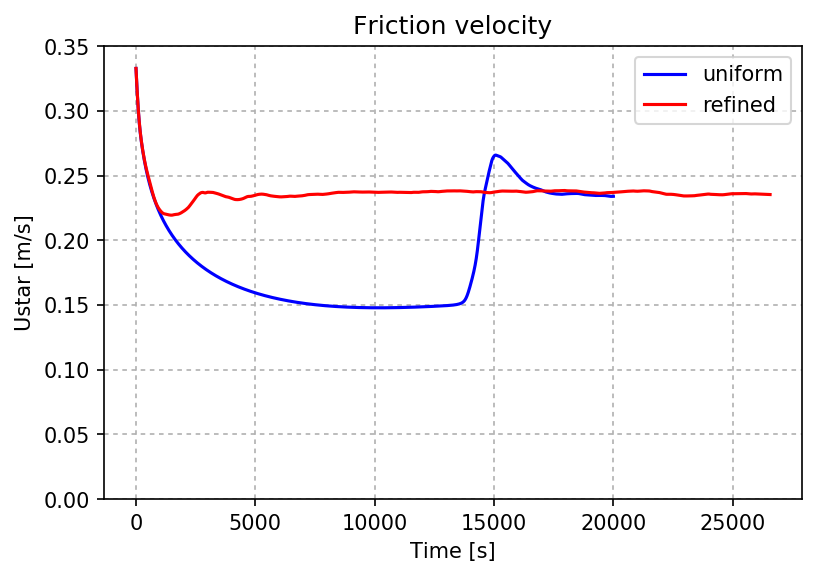

In [11]:
plt.figure(figsize=(6,4), dpi=150)
plt.plot(amrdat['ustar']['t'],  amrdat['ustar']['data'],  'b', label='uniform')
plt.plot(wdirdat['ustar']['t'], wdirdat['ustar']['data'], 'r', label='refined')
plt.legend()
plt.ylim([0, 0.35])
plt.grid(ls=':')
plt.xlabel('Time [s]')
plt.ylabel('Ustar [m/s]')
plt.title('Friction velocity')

Loading u
Loading v
Loading u
Loading v


(0, 2000)

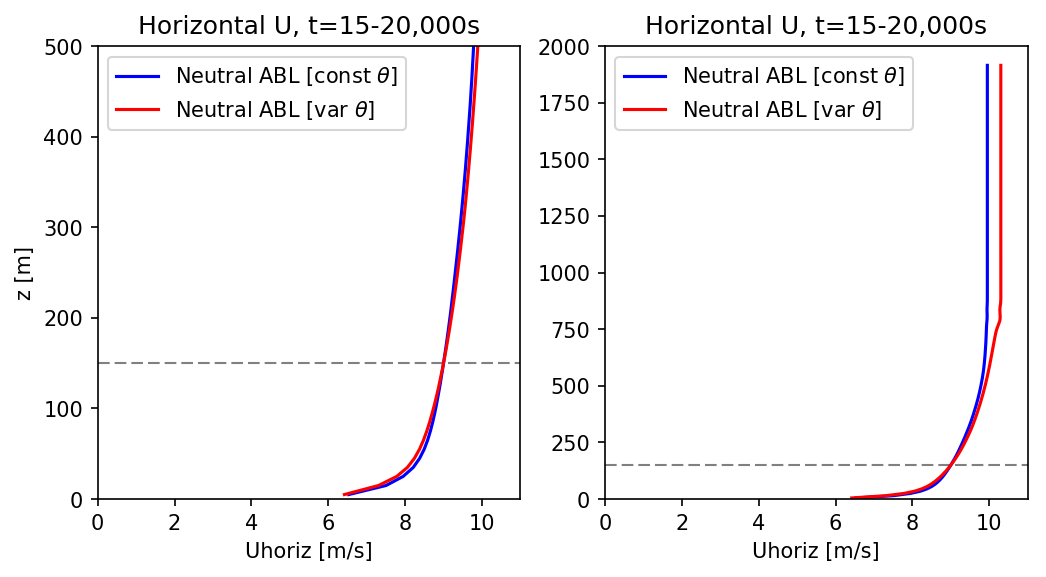

In [12]:
# Plot velocity
fig, axs = plt.subplots(1,2, figsize=(8,4), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
amrdat = case.ABLpostpro_plotprofiles(plotvars=['Uhoriz'], avgt=avgtimes)
wdirdat = wdir.ABLpostpro_plotprofiles(plotvars=['Uhoriz'], avgt=avgtimes)

for ax in axs:
    ax.plot(amrdat['Uhoriz']['data'], amrdat['Uhoriz']['z'], color='b', label=r'Neutral ABL [const $\theta$]')
    ax.plot(wdirdat['Uhoriz']['data'], wdirdat['Uhoriz']['z'], color='r', label=r'Neutral ABL [var $\theta$]')
    ax.hlines(plotheights[0], 0, 11, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
    ax.set_xlim([0, 11])    
    ax.set_xlabel('Uhoriz [m/s]')
    ax.set_title('Horizontal U, t=15-20,000s')
    ax.legend()

axs[0].set_ylabel('z [m]')
axs[0].set_ylim([0, 500])
axs[1].set_ylim([0, 2000])

Loading theta
Loading theta


(0, 2000)

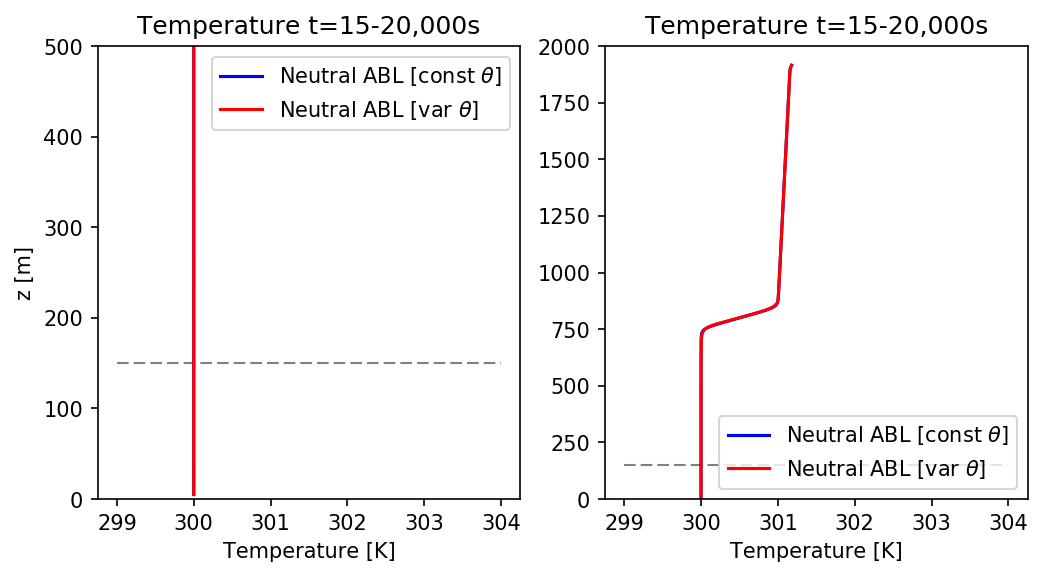

In [13]:
# Plot Temperature
fig, axs = plt.subplots(1,2, figsize=(8,4), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
amrdat = case.ABLpostpro_plotprofiles(plotvars=['Temperature'], avgt=avgtimes)
wdirdat= wdir.ABLpostpro_plotprofiles(plotvars=['Temperature'], avgt=avgtimes)

for ax in axs:
    ax.plot(amrdat['T']['data'], amrdat['T']['z'], color='b', label=r'Neutral ABL [const $\theta$]')
    ax.plot(wdirdat['T']['data'], wdirdat['T']['z'], color='r', label=r'Neutral ABL [var $\theta$]')
    ax.hlines(plotheights[0], 299, 304, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
    ax.set_xlabel('Temperature [K]')
    ax.set_title('Temperature t=15-20,000s')
    ax.legend()

axs[0].set_ylabel('z [m]')
axs[0].set_ylim([0, 500])
axs[1].set_ylim([0, 2000])


Loading u
Loading v
Loading u
Loading v


(0, 2000)

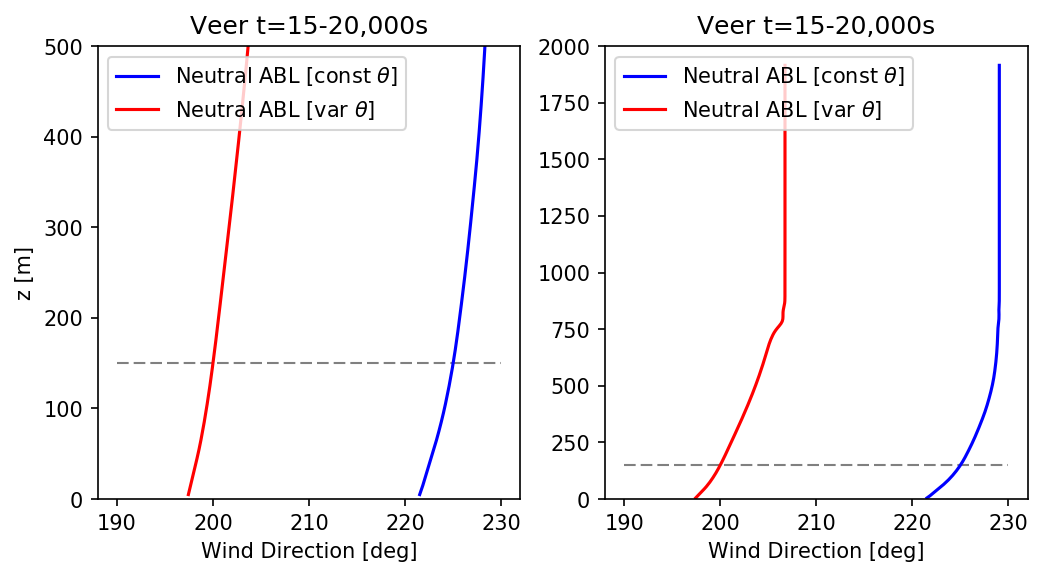

In [14]:
# Plot wind direction
fig, axs = plt.subplots(1,2, figsize=(8,4), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
amrdat = case.ABLpostpro_plotprofiles(plotvars=['WindDir'], avgt=avgtimes)
wdirdat= wdir.ABLpostpro_plotprofiles(plotvars=['WindDir'], avgt=avgtimes)

for ax in axs:
    ax.plot(amrdat['WindDir']['data'], amrdat['WindDir']['z'], color='b', label=r'Neutral ABL [const $\theta$]')
    ax.plot(wdirdat['WindDir']['data'], wdirdat['WindDir']['z'], color='r', label=r'Neutral ABL [var $\theta$]')

    ax.hlines(plotheights[0], 190, 230, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
    ax.set_xlabel('Wind Direction [deg]')
    ax.set_title('Veer t=15-20,000s')
    ax.legend()
axs[0].set_ylabel('z [m]')
axs[0].set_ylim([0, 500])
axs[1].set_ylim([0, 2000])

### Plot some wind direction profiles over time

[21400, 21600]
Loading u
Loading v
[22400, 22600]
Loading u
Loading v
[23400, 23600]
Loading u
Loading v
[23900, 24100]
Loading u
Loading v
[24900, 25100]
Loading u
Loading v


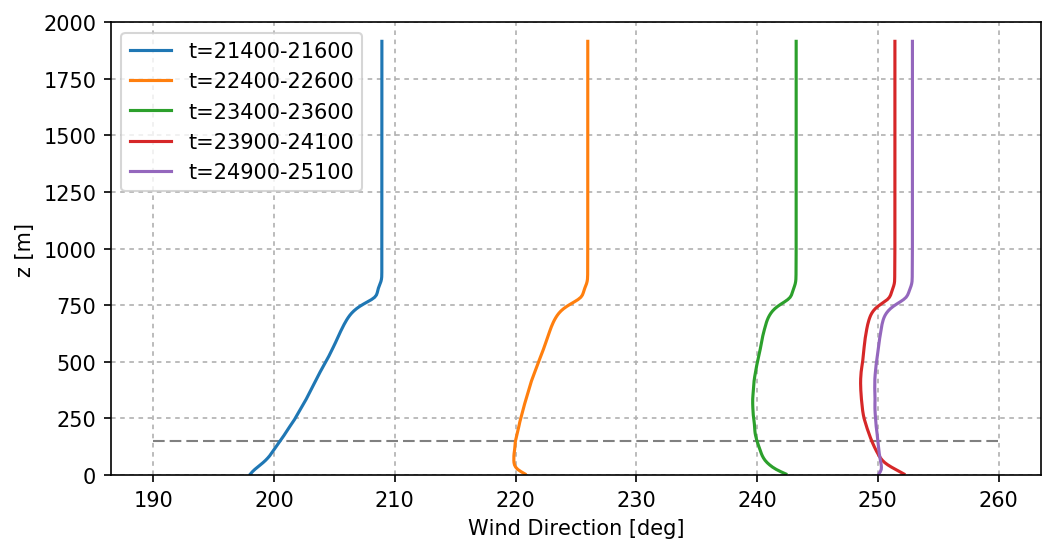

In [15]:
avgtvec = [
           [21400, 21600],
           [22400, 22600],
           [23400, 23600],
           [23900, 24100],    
           [24900, 25100],        
          ]

# Plot wind direction
fig, axs = plt.subplots(1,1, figsize=(8,4), facecolor='w', dpi=150)

for avgt in avgtvec:
    print(avgt)
    wdirdat= wdir.ABLpostpro_plotprofiles(plotvars=['WindDir'], avgt=avgt)
    axs.plot(wdirdat['WindDir']['data'], wdirdat['WindDir']['z'], label=r't=%.0f-%.0f'%(avgt[0], avgt[1]))
    
axs.hlines(plotheights[0], 190, 260, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
axs.legend(loc='upper left')
axs.set_ylim([0, 2000])
axs.grid(ls=':')
axs.set_xlabel('Wind Direction [deg]')
axs.set_ylabel('z [m]')

### Plot uhorizontal velocity profiles over time

[21400, 21600]
Loading u
Loading v
Loading u
Loading v
Loading w
[22400, 22600]
Loading u
Loading v
Loading u
Loading v
Loading w
[23400, 23600]
Loading u
Loading v
Loading u
Loading v
Loading w
[23900, 24100]
Loading u
Loading v
Loading u
Loading v
Loading w
[24900, 25100]
Loading u
Loading v
Loading u
Loading v
Loading w


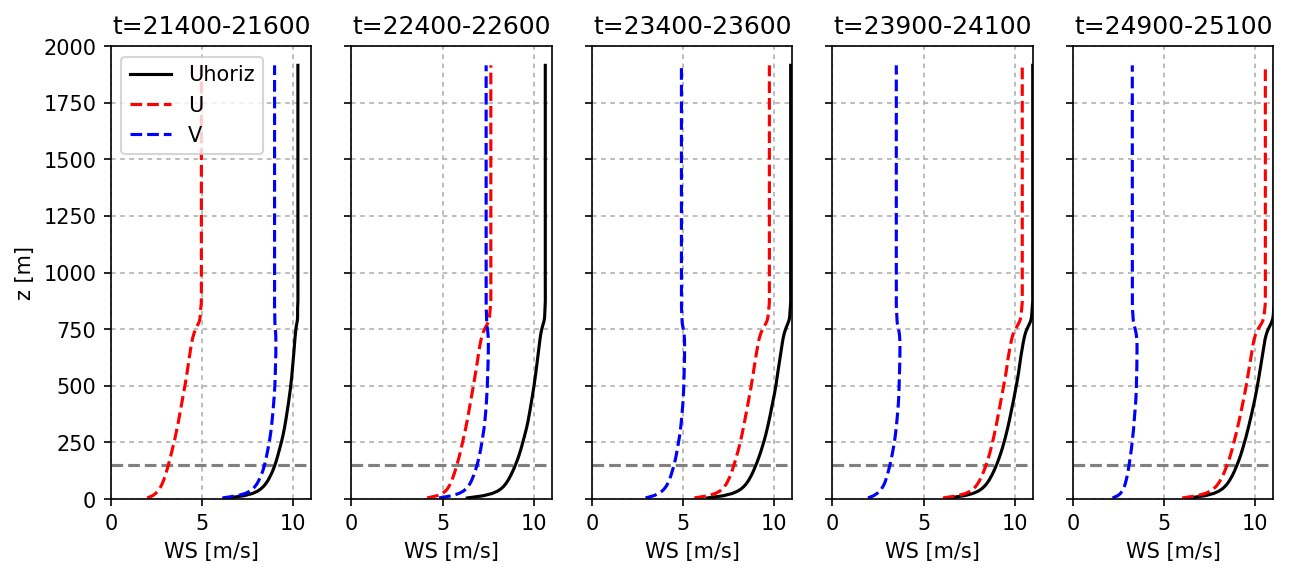

In [16]:
avgtvec = [
           [21400, 21600],
           [22400, 22600],
           [23400, 23600],
           [23900, 24100],    
           [24900, 25100],        
          ]
Nplots=len(avgtvec)

# Plot wind direction
fig, axs = plt.subplots(1, Nplots, figsize=(2*Nplots,4), facecolor='w', dpi=150, sharey=True)

for iavg, avgt in enumerate(avgtvec):
    print(avgt)
    wdirdat= wdir.ABLpostpro_plotprofiles(plotvars=['Uhoriz','velocity'], avgt=avgt)
    axs[iavg].plot(wdirdat['Uhoriz']['data'], wdirdat['Uhoriz']['z'], color='k', label=r'Uhoriz')
    #print(wdirdat['velocity'])
    axs[iavg].plot(wdirdat['u']['data'], wdirdat['u']['z'], '--', color='r', label=r'U')
    axs[iavg].plot(wdirdat['v']['data'], wdirdat['v']['z'], '--', color='b', label=r'V')
    
    axs[iavg].hlines(plotheights[0], 0, 11, linestyles='dashed', color='gray', linewidth=1.5) # Plot the HH line
    #axs.legend()
    axs[iavg].set_xlim([0, 11])
    axs[iavg].set_ylim([0, 2000])
    axs[iavg].grid(ls=':')
    #axs.set_xlabel('Wind Direction [deg]')
    axs[iavg].set_title('t=%.0f-%.0f'%(avgt[0],avgt[1]))
    axs[iavg].set_xlabel('WS [m/s]')
    
axs[0].set_ylabel('z [m]')
axs[0].legend()

## Make some contour plots

In [17]:
import postproamrwindsample as ppsample
wdir.Samplepostpro_loadnetcdffile(wdirdir+'/post_processing/sampling00000.nc')

Loading /ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor3_6x6_small_dirchange/post_processing/sampling00000.nc


### For t = 20,000 (250s x 80)

In [18]:
x,y,z,s1,s2,vx = ppsample.getPlaneSampleAtTime(wdir.sample_ncdat, 'p_hub', 'velocityx', 80, 1)
x,y,z,s1,s2,vy = ppsample.getPlaneSampleAtTime(wdir.sample_ncdat, 'p_hub', 'velocityy', 80, 1)

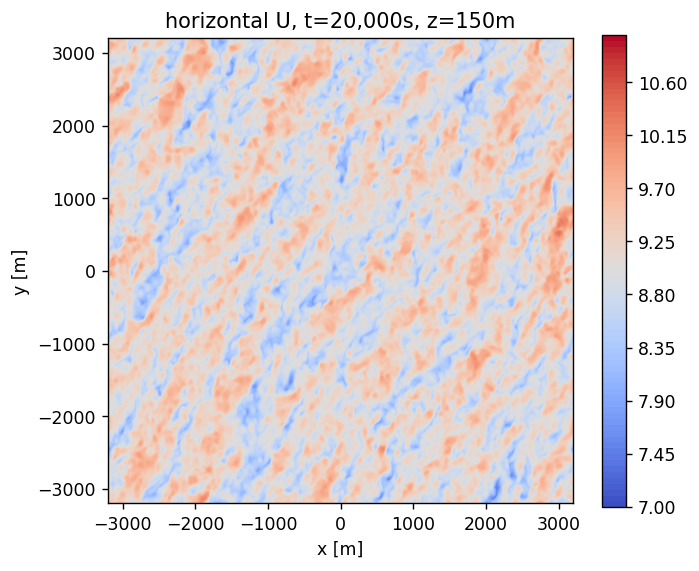

In [19]:
vh = np.sqrt(vx**2 + vy**2)

clevels=np.linspace(7,11,81)
plt.figure(figsize=(6,5), dpi=125)
plt.contourf(x, y, vh, clevels, cmap='coolwarm')
plt.colorbar()
plt.axis('scaled')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('horizontal U, t=20,000s, z=150m')

### For t = 23,000 (250s x 92)

In [20]:
x,y,z,s1,s2,vx = ppsample.getPlaneSampleAtTime(wdir.sample_ncdat, 'p_hub', 'velocityx', 92, 1)
x,y,z,s1,s2,vy = ppsample.getPlaneSampleAtTime(wdir.sample_ncdat, 'p_hub', 'velocityy', 92, 1)

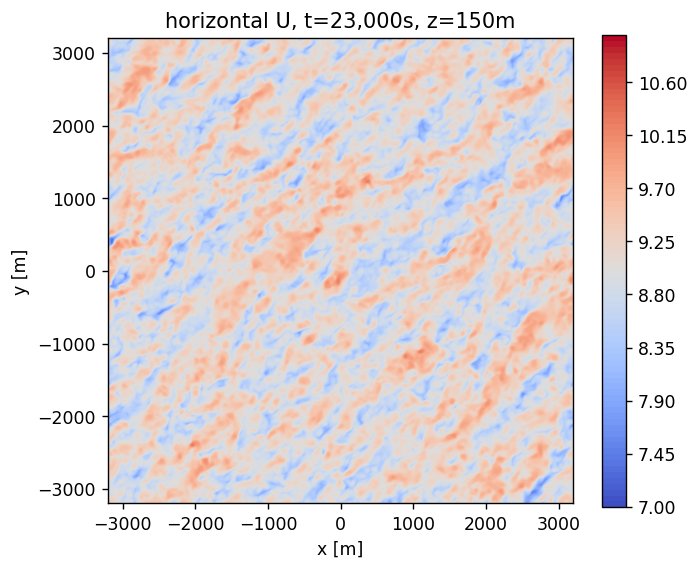

In [21]:
vh = np.sqrt(vx**2 + vy**2)

clevels=np.linspace(7,11,81)
plt.figure(figsize=(6,5), dpi=125)
plt.contourf(x, y, vh, clevels, cmap='coolwarm')
plt.colorbar()
plt.axis('scaled')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('horizontal U, t=23,000s, z=150m')

### For t = 25,000 (250s x 100)

In [22]:
x,y,z,s1,s2,vx = ppsample.getPlaneSampleAtTime(wdir.sample_ncdat, 'p_hub', 'velocityx', 100, 1)
x,y,z,s1,s2,vy = ppsample.getPlaneSampleAtTime(wdir.sample_ncdat, 'p_hub', 'velocityy', 100, 1)

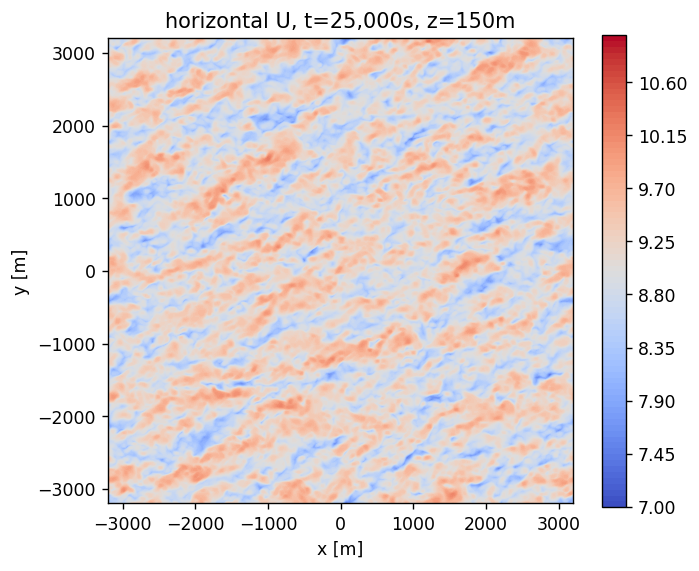

In [23]:
vh = np.sqrt(vx**2 + vy**2)

clevels=np.linspace(7,11,81)
plt.figure(figsize=(6,5), dpi=125)
plt.contourf(x, y, vh, clevels, cmap='coolwarm')
plt.colorbar()
plt.axis('scaled')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('horizontal U, t=25,000s, z=150m')